In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
two_blobs = pd.read_csv('cluster_two_blobs.csv')

In [41]:
two_blobs_outliers = pd.read_csv('cluster_two_blobs_outliers.csv')

<AxesSubplot:xlabel='X1', ylabel='X2'>

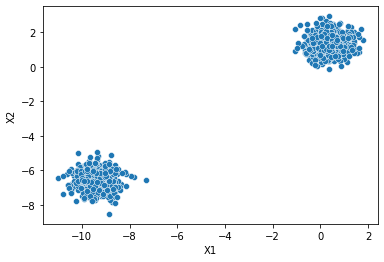

In [42]:
sns.scatterplot(data=two_blobs, x='X1', y='X2')

<AxesSubplot:xlabel='X1', ylabel='X2'>

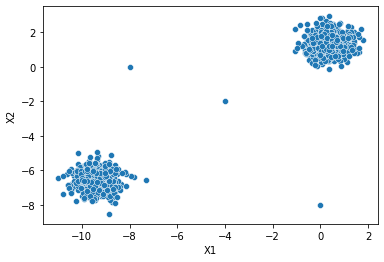

In [43]:
sns.scatterplot(data=two_blobs_outliers, x='X1', y='X2')

In [44]:
def display_categories(model, data):
    labels = model.fit_predict(data)
    sns.scatterplot(data=data, x='X1', y='X2', hue=labels, palette='Set1')

In [45]:
from sklearn.cluster import DBSCAN

In [46]:
dbscan = DBSCAN()

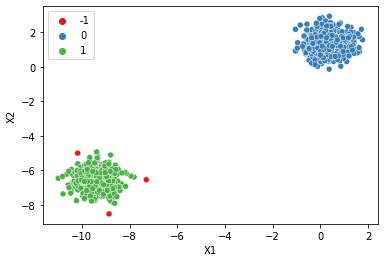

In [47]:
display_categories(dbscan, two_blobs)

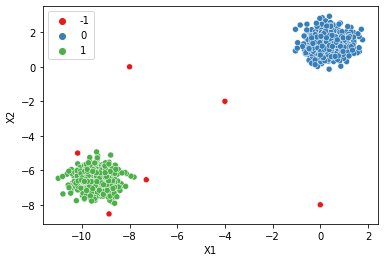

In [48]:
display_categories(dbscan, two_blobs_outliers)

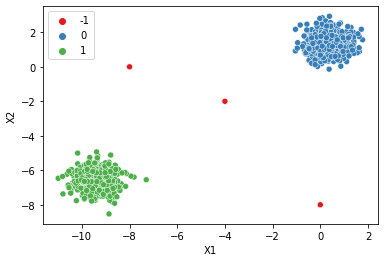

In [49]:
dbscan = DBSCAN(eps=1)
display_categories(dbscan, two_blobs_outliers)

In [50]:
np.sum(dbscan.labels_ == -1)

3

In [51]:
100* np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)

0.29910269192422734

In [52]:
len(dbscan.labels_)

1003

In [53]:
outlier_percent = []
number_of_outliers = []
for eps in np.linspace(0.001, 10, 100):

    dbscan = DBSCAN(eps=eps)
    dbscan.fit(two_blobs_outliers)

    number_of_outliers.append(np.sum(dbscan.labels_ == -1))

    perc_outlier = 100 * np.sum(dbscan.labels_ == -1)/len(dbscan.labels_)

    outlier_percent.append(perc_outlier)


<AxesSubplot:>

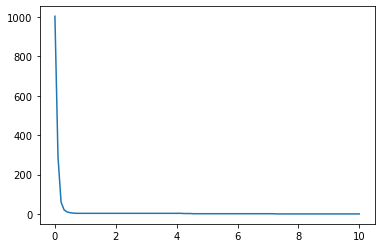

In [54]:
sns.lineplot(x=np.linspace(0.001, 10, 100), y=number_of_outliers)

Text(0, 0.5, 'Percent of Points classified as Outliers')

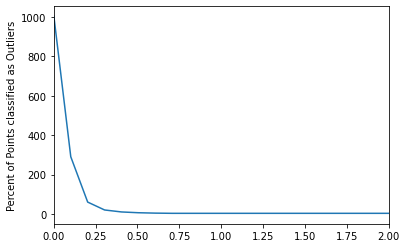

In [55]:
sns.lineplot(x=np.linspace(0.001, 10, 100), y=number_of_outliers)
plt.xlim(0, 2)
plt.ylabel('Percent of Points classified as Outliers')